# Analisis del espectro IR de CO

In [20]:
import numpy as np
import matplotlib.pyplot as plt

En primer lugar cargamos los datos correspondientes a los picos del espectro. Leemos valores de intensidad con respecto al número de onda en cm$^{-1}$.

In [21]:
data = np.loadtxt("co_columns.dat")

A continuación, identificamos el **origen de banda**. Para ello calculamos la diferencia entre picos sucesivos

In [22]:
data

array([[2046.47 ,   36.395],
       [2060.45 ,   35.864],
       [2064.82 ,   32.65 ],
       [2065.81 ,   35.324],
       [2068.84 ,   36.26 ],
       [2074.2  ,   36.048],
       [2077.59 ,   36.054],
       [2081.95 ,   35.931],
       [2086.3  ,   35.886],
       [2087.39 ,   35.854],
       [2090.07 ,   34.343],
       [2094.86 ,   35.652],
       [2099.05 ,   35.549],
       [2103.26 ,   35.441],
       [2107.41 ,   35.302],
       [2111.52 ,   35.257],
       [2115.59 ,   35.195],
       [2119.67 ,   35.203],
       [2123.67 ,   35.237],
       [2127.66 ,   35.262],
       [2131.6  ,   35.366],
       [2136.09 ,   35.091],
       [2139.37 ,   35.373],
       [2147.14 ,   35.464],
       [2150.83 ,   35.283],
       [2154.59 ,   35.1  ],
       [2158.28 ,   34.899],
       [2161.9  ,   34.619],
       [2165.57 ,   34.659],
       [2169.17 ,   34.563],
       [2172.74 ,   34.506],
       [2176.27 ,   34.532],
       [2179.75 ,   34.495],
       [2183.19 ,   34.547],
       [2186.6

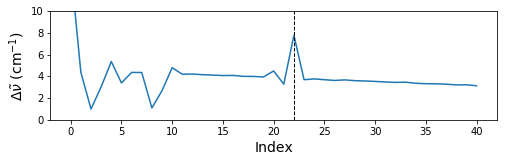

In [23]:
fig, ax = plt.subplots(figsize=(8,2)) 
ax.plot([data[i,0] - data[i-1,0] for i in range(1,len(data))])
ax.set_ylim(0,10)
ax.axvline(22,0,10, ls='--', c='k', lw=1)
ax.set_xlabel('Index', fontsize=14)
_ = ax.set_ylabel(r'$\Delta\tilde{\nu}$ (cm$^{-1}$) ', fontsize=14)

Esto significa que a la izquierda del valor señalado, nos encontramos la rama P del espectro ($\Delta J=-1$) mientras que a la izquierda nos encontramos la rama R ($\Delta J=+1$).

In [24]:
Rbranch = data[23:]
Pbranch = np.array([x for x in reversed(data[:23])])

A continuación, mostramos las ecuaciones correspondientes a las ramas P y R del espectro roto-vibracional

$$\tilde{\nu}(P_J)=\tilde{\nu}_0 + B_1J(J+1) - B_0J(J+1)\textrm{, para }J=0,1,2,...$$

$$\tilde{\nu}(R_J)=\tilde{\nu}_0 + B_1(J+1)(J+2) - B_0J(J+1)\textrm{, para }J= 1,2,...$$

### Cálculo de las constantes rotacionales
Para obtener las constantes rotacionales $B_0$ y $B_1$ usamos el **método de las diferencias**. 

En concreto, para obtener $B_1$ usamos diferencias de líneas del espectro que correspondan a transiciones rotacionales desde el mismo nivel inicial, $\tilde{\nu}(R_J) - \tilde{\nu}(P_J)$. En general el resultado de su resta es:

$$\tilde{\nu}(R_J)-\tilde{\nu}(P_J)=4B_1(J+1/2)$$

In [25]:
Jvals = []
diff = []
for i in range(1,12):
    Jvals.append(i)
    diff.append(Rbranch[i,0] - Pbranch[i-1,0])

Para nuestro *set* de datos podemos representar una recta usando estas diferencias, y la pendiente nos da el resultado correspondiente a $B_1$.

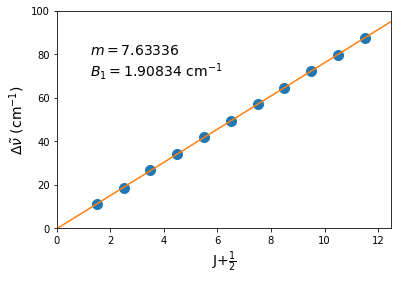

In [26]:
fit = np.polyfit([x+1./2 for x in Jvals], diff, 1)
B1 = fit[0]/4
fig, ax = plt.subplots()
ax.plot([x+1./2 for x in Jvals], diff, 'o', ms=10)
ax.plot(np.linspace(0,13,2), np.polyval(fit, np.linspace(0,13,2)))
ax.set_xlim(0,12.5)
ax.set_ylim(0,100)
ax.text(0.1,0.8, r'$m=$%g'%fit[0], transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.7, r'$B_1=$%g cm$^{-1}$'%B1, transform=ax.transAxes, fontsize=14)
ax.set_xlabel(r'J+$\frac{1}{2}$', fontsize=14)
_ = ax.set_ylabel(r'$\Delta \tilde{\nu}$ (cm$^{-1}$)', fontsize=14)

A continuación obtenemos las diferencias para elementos correspondientes a un mismo nivel rotacional final, es decir $\tilde{\nu}(R_{J-1})$ y $\tilde{\nu}(P_{J+1}$):

$$\tilde{\nu}(R_{J-1})-\tilde{\nu}(P_{J+1})=4B_0(J+1/2)$$

Seguimos el mismo procedimiento para obtener esta constante rotacional.

In [27]:
Jvals = []
diff = []
for i in range(1,12):
    Jvals.append(i)
    diff.append(Rbranch[i-1,0] - Pbranch[i,0])

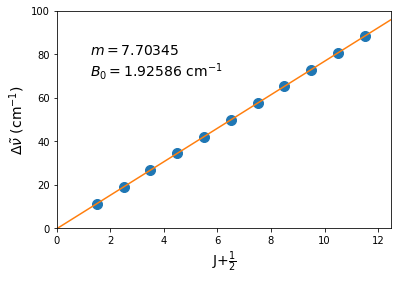

In [36]:
fit = np.polyfit([x + 1./2 for x in Jvals], diff, 1)
B0 = fit[0]/4
fig, ax = plt.subplots()
ax.plot([x+1./2 for x in Jvals], diff, 'o', ms=10)
ax.plot(np.linspace(0,13,2), np.polyval(fit, np.linspace(0,13,2)))
ax.set_xlim(0,12.5)
ax.set_ylim(0,100)
ax.text(0.1,0.8, r'$m=$%g'%fit[0], transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.7, r'$B_0=$%g cm$^{-1}$'%B0, transform=ax.transAxes, fontsize=14)
ax.set_xlabel(r'J+$\frac{1}{2}$', fontsize=14)
_ = ax.set_ylabel(r'$\Delta \tilde{\nu}$ (cm$^{-1}$)', fontsize=14)

Ahora que tenemos los valores de las constantes rotacionales $B_0$ y $B_1$, podemos obtener el valor de la constante $\alpha$ y $B_e$
$$
B_v=B_e - \alpha\big(v+\frac{1}{2}\big)
$$
Podemos formular un sistema de dos ecuaciones con dos incógnitas, que resolvemos para obtener
$$
\alpha = B_0-B_1$$$$
B_e = B_0 + \frac{\alpha}{2}
$$

In [37]:
alpha = B0 - B1
Be = B0 + alpha*0.5
print ("alpha = %g cm^-1"%alpha)
print ("Be = %g cm^-1"%Be)

alpha = 0.0175227 cm^-1
Be = 1.93462 cm^-1


A continuación calculamos el **origen de banda**, $\tilde{\nu}_0$, a partir de los valores de $\tilde{\nu}(R_0)$ o bien de $\tilde{\nu}(P_1)$. Las expresiones que vamos a utilizar son:
$$
\tilde{\nu}_0=\tilde{\nu}(0\rightarrow 1)=\tilde{\nu}(R_0) - 2B_1
$$
$$
\tilde{\nu}_0=\tilde{\nu}(P_1) + 2B_0
$$

In [45]:
nu0 = Pbranch[0,0] + 2*B1
print ("%g cm^-1"%nu0)
nu0 = Rbranch[0,0] - 2*B0
print ("%g cm^-1"%nu0)

2143.19 cm^-1
2143.29 cm^-1


Seguimos con el cálculo de la frecuencia de vibración, $\omega_e$ y de $x_e$. De nuevo, podemos plantear un sistema de ecuaciones
$$
\tilde{\nu}(0\rightarrow 1)=\tilde{\omega}_e - 2\tilde{\omega}_ex_e
$$
$$
\tilde{\nu}(0\rightarrow 2)=2\tilde{\omega}_e - 6\tilde{\omega}_ex_e
$$
Fácilmente, podemos despejar $\tilde{\omega}_e=\tilde{\nu}_0 + 2\tilde{\omega}_ex_e$, que al ser sustituido en la expresión del primer sobretono resulta en $\tilde{\omega}_ex_e=\tilde{\nu}_0 - 1/2\tilde{\nu}(0\rightarrow 2) $

In [39]:
nu1 = 4260.04 # cm^-1
wexe = nu0 - 0.5*(nu1)
print ("w_e*x_e = %g cm^-1"%wexe)
we = nu0 + 2*wexe 
print ("w_e = %g cm^-1"%we)
print ("x_e = %10.3e"%(wexe/we))

w_e*x_e = 13.2683 cm^-1
w_e = 2169.82 cm^-1
x_e =  6.115e-03


A continuación, obtenemos el valor para la constante de fuerza del enlace, $k$, que derivamos a partir de la expresión
$$
\tilde{\omega_e}=\frac{1}{2\pi c}\sqrt{\frac{k}{\mu}}
$$
Por tanto, la constante se puede obtener a partir de parámetros que nos son conocidos
$$
k=\mu \tilde{\omega}_e4\pi^2c^2
$$
donde $\mu$ es la masa reducida que podemos calcular como $\mu=m_\mathrm{C}m_\mathrm{O}/(m_\mathrm{C}+m_\mathrm{O})/N_\mathrm{A}$


In [40]:
c = 3.e10 # m/s
mu = 12e-3*16e-3/(12e-3+16e-3)*1/6.022e23 
print ("mu = %g kg"%mu)
k = mu*(we*2.*np.pi*c)**2
print ("k = %g N/m"%k)

mu = 1.13868e-26 kg
k = 1904.82 N/m


A partir del valor del valor de $B_e$ podemos calcular también el **momento de inercia**, $I$,
$$
I=\frac{h}{8\pi^2B_ec}
$$

In [41]:
h = 6.62607004e-34 # m2*kg/s
I = h/(8*np.pi**2*Be*c)
print ("I = %g kg/m^2"%I)

I = 1.44593e-46 kg/m^2


El momento de inercia para una molécula diatómnica se define como $I=\mu R_{eq}^2$. Despejando la distancia de equilibrio,
$$
R_{eq} = \sqrt{\frac{I}{\mu}}
$$

In [42]:
Req = np.sqrt(I/mu)
print ("Req = %g m"%Req)

Req = 1.12687e-10 m


Concluimos calculando la constante de distorsión centrífuga, $D$, a partir de la expresión
$$
D = \frac{4B_e^3}{\tilde{\omega}_e^2}
$$

In [44]:
D = 4*Be**3/we**2
print ("D = %g cm^-1"%D)

D = 6.15178e-06 cm^-1
